Part 2 will be the actual machine learning modelling

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import time

In [2]:
# read the preprocessed file
df1=pd.read_csv('new-financial-data.csv')

In [3]:
## Data Preparation
entry_id=df1['entry_id']
df1=df1.drop(columns='entry_id')

In [4]:
# One Hot Encoding
df1=pd.get_dummies(df1)     # Transform object into numeric by separate each object values as a column.
#df1=df1.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])  # drop na columns

In [5]:
# Call train_test_split to create train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns=['e_signed']),    # X values
                                                    df1['e_signed'],                   # y values
                                                    test_size = 0.2,                   # percentage for test
                                                    random_state=0)                    # randam seed


In [6]:
## Balancing the training set
## Need a more balance +/- eg same number of positive and negative 
pos_index = y_train[y_train.values==1].index # get the index of all positive value
neg_index = y_train[y_train.values==0].index # get the index of all positive value

if len(pos_index) > len(neg_index):  # determine which has more entries
    higher = pos_index
    lower  = neg_index
else:
    higher = neg_index
    lower  = pos_index

random.seed(0)

# This will generate random number of entries
higher = np.random.choice(higher, size=len(lower))  
lower  = np.asarray(lower)        # to make lower the same array as higher
new_indexes = np.concatenate((higher,lower))

X_train = X_train.loc[new_indexes,]
y_train = y_train.loc[new_indexes,]

---
Normalize the data for better fitting


In [7]:
## Feature scaling (normalization)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2  = pd.DataFrame(sc_X.fit_transform(X_test))
## Add columns for train2 and test2
X_train2.columns = X_train.columns.values
X_test2.columns  = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test  = X_test2

---
Fitting a model - Using Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=0)  # create a logistic Regression Model
classifier.fit(X_train, y_train)               # fit the model with train data


y_pred=classifier.predict(X_test)              # Use Test data to create a predicated data

# To evaluate the results

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, \
                            precision_score,recall_score

cm=confusion_matrix(y_test,y_pred)          # confusion matrix
accuracy = accuracy_score(y_test,y_pred)    # Accuracy score
f1 = f1_score(y_test,y_pred)                # F1 score is similar to accuracy score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
print('cm=',cm) 
print('accuracy score=', accuracy)
print('f1 score=', f1)
print('precision score=', precision)
print('recall score=', recall)

cm= [[ 936  718]
 [ 861 1067]]
accuracy score= 0.5591848129536572
f1 score= 0.5747374091031511
precision score= 0.5977591036414566
recall score= 0.5534232365145229


Test Data Accuracy: 0.5592


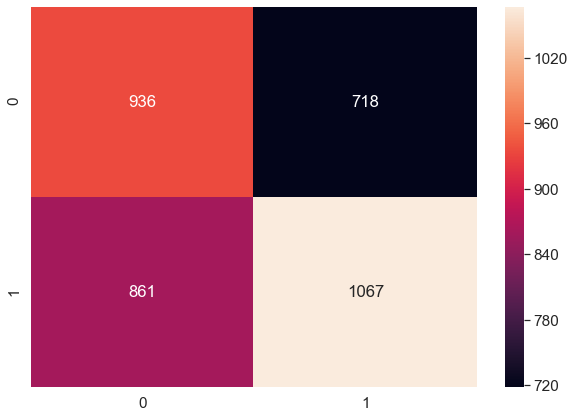

In [10]:
## create a heatmap 
df_cm=pd.DataFrame(cm, index=(0,1), columns =(0,1))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f"% accuracy_score(y_test,y_pred))

In [11]:
# cross validation 
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(),accuracies.std() * 2))

/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logisti

Logistic Accuracy: 0.572 (+/- 0.018)


/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
# Analyzing Coefficients  = theta in the linear equation function?
# higher coef values meaning more weight on the overall evaluation of the result.
# eg purchases and purchases_partners


pd.concat([pd.DataFrame(X_train.columns, columns = ['features']),
           pd.DataFrame(np.transpose(classifier.coef_), columns=['coef'])],
           axis = 1)

,features,coef
0,age,-0.230236
1,home_owner,-0.106375
2,income,0.070034
3,current_address_year,-0.017985
4,has_debt,0.076368
5,amount_requested,0.090311
6,risk_score,0.218585
7,risk_score_2,0.008230
8,risk_score_3,-0.078583
9,risk_score_4,-0.002469


In [13]:
## features Selection

from sklearn.feature_selection import RFE     # What is RFE?
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()  # Create a new classifier?
rfe = RFE(classifier, 10)          # Will use 20 columns
rfe = rfe.fit(X_train, y_train)

/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logisti

In [14]:
pd.concat([pd.DataFrame(X_train.columns, columns = ['features']),
           pd.DataFrame(np.transpose(rfe.support_), columns=['support'])],
           axis = 1)
X_train.columns[rfe.support_]

Index(['age', 'home_owner', 'income', 'has_debt', 'amount_requested',
       'risk_score', 'risk_score_3', 'ext_quality_score',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly'],
      dtype='object')

---
We can continue witht the sub columns but 

In [15]:
#print("df1.head() : \n",df1.head())
#print("df1.info()",df1.info())
#print("df1.describe()\n",df1.describe())
#df1.dtypes==object
#print("df1.columns : \n",df1.columns)
#print("df1.columns type: \n",df1.dtypes)

#print(X_train[:5])
#print(X_train.shape)
#print(y_train.shape)

#print(X_test.shape)
#print(y_test.shape)

#print(y_train.value_counts())
#print(y_test.value_counts())

#print(X_test.head())
#print(y_train.head())
#print(y_test.head())

---
Since the result of the logistic is not very good, lets try another fitting model.


In [33]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=0)  # create a logistic Regression Model
classifier.fit(X_train, y_train)               # fit the model with train data


y_pred=classifier.predict(X_test)              # Use Test data to create a predicated data

# To evaluate the results

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, \
                            precision_score,recall_score

cm=confusion_matrix(y_test,y_pred)          # confusion matrix
accuracy = accuracy_score(y_test,y_pred)    # Accuracy score
f1 = f1_score(y_test,y_pred)                # F1 score is similar to accuracy score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

results=pd.DataFrame([['Linear Regression (Lasso)', accuracy, precision, recall, f1]],
                    columns = ['Model','Accuracy', 'precision', 'recall', 'f1'])

/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
# Print out the scores

print('results\n', results)

results
                        Model  Accuracy  precision    recall        f1
0  Linear Regression (Lasso)  0.559185   0.597759  0.553423  0.574737


In [35]:
# SVM
from sklearn.svm import SVC
classifier=SVC(random_state=0, kernel='linear' )  # create a SVC Model
classifier.fit(X_train, y_train)               # fit the model with train data


y_pred=classifier.predict(X_test)              # Use Test data to create a predicated data

# To evaluate the results

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, \
                            precision_score,recall_score

cm=confusion_matrix(y_test,y_pred)          # confusion matrix
accuracy = accuracy_score(y_test,y_pred)    # Accuracy score
f1 = f1_score(y_test,y_pred)                # F1 score is similar to accuracy score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

model_results=pd.DataFrame([['SVC Model', accuracy, precision, recall, f1]],
                    columns = ['Model','Accuracy', 'precision', 'recall', 'f1'])
results=results.append(model_results, ignore_index=True)

In [36]:
# Print out the scores

print('results\n', results)

results
                        Model  Accuracy  precision    recall        f1
0  Linear Regression (Lasso)  0.559185   0.597759  0.553423  0.574737
1                  SVC Model  0.558906   0.597973  0.550830  0.573434


In [37]:
# SVC RBF
from sklearn.svm import SVC
classifier=SVC(random_state=0, kernel='rbf' )  # create a SVC Model
classifier.fit(X_train, y_train)               # fit the model with train data


y_pred=classifier.predict(X_test)              # Use Test data to create a predicated data

# To evaluate the results

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, \
                            precision_score,recall_score

cm=confusion_matrix(y_test,y_pred)          # confusion matrix
accuracy = accuracy_score(y_test,y_pred)    # Accuracy score
f1 = f1_score(y_test,y_pred)                # F1 score is similar to accuracy score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

model_results=pd.DataFrame([['SVC (RBF) Model', accuracy, precision, recall, f1]],
                    columns = ['Model','Accuracy', 'precision', 'recall', 'f1'])
results=results.append(model_results, ignore_index=True)

In [38]:
# Print out the scores

print('results\n', results)

results
                        Model  Accuracy  precision    recall        f1
0  Linear Regression (Lasso)  0.559185   0.597759  0.553423  0.574737
1                  SVC Model  0.558906   0.597973  0.550830  0.573434
2            SVC (RBF) Model  0.596873   0.645608  0.556535  0.597772


In [40]:
#  Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state=0, n_estimators=100, 
                                  criterion = 'entropy')       # create a Random Forest Model
classifier.fit(X_train, y_train)               # fit the model with train data


y_pred=classifier.predict(X_test)              # Use Test data to create a predicated data

# To evaluate the results

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, \
                            precision_score,recall_score

cm=confusion_matrix(y_test,y_pred)          # confusion matrix
accuracy = accuracy_score(y_test,y_pred)    # Accuracy score
f1 = f1_score(y_test,y_pred)                # F1 score is similar to accuracy score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

model_results=pd.DataFrame([['Random Forest(n=100)', accuracy, precision, recall, f1]],
                    columns = ['Model','Accuracy', 'precision', 'recall', 'f1'])
results=results.append(model_results, ignore_index=True)

In [41]:
# Print out the scores

print('results\n', results)

results
                        Model  Accuracy  precision    recall        f1
0  Linear Regression (Lasso)  0.559185   0.597759  0.553423  0.574737
1                  SVC Model  0.558906   0.597973  0.550830  0.573434
2            SVC (RBF) Model  0.596873   0.645608  0.556535  0.597772
3       Random Forest(n=100)  0.589056   0.718391  0.389004  0.504711


In [42]:
# cross validation 
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Random Forest CV Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(),accuracies.std() * 2))

Random Forest CV Accuracy: 0.769 (+/- 0.016)


In [49]:
# More random forest with manual parameters
parameters={"max_depth":[3, None],
            "max_features":[1,5,10],
            "min_samples_split":[2,5,10],
            "min_samples_leaf":[1,5,10],
            "bootstrap":[True,False],
            "criterion":["entropy"]             # also try "gini"
           }

from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator = classifier,
                         param_grid = parameters,
                         scoring = "accuracy",
                         cv=10,
                         n_jobs = -1)         

t0=time.time()
grid_search=grid_search.fit(X_train, y_train)
t1 = time.time()

print("Time to run = %0.2f seconds" % (t1-t0))


Time to run = 2370.91 seconds


In [51]:
rf_best_accuracy=grid_search.best_score_
rf_best_parameters=grid_search.best_params_
print("best score = ",rf_best_accuracy)
print("best params =", rf_best_parameters)


best score =  0.7785336356764928
best params = {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [52]:
#  Random Forest Model from grid_search


y_pred=grid_search.predict(X_test)              # Use Test data to create a predicated data

# To evaluate the results

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, \
                            precision_score,recall_score

cm=confusion_matrix(y_test,y_pred)          # confusion matrix
accuracy = accuracy_score(y_test,y_pred)    # Accuracy score
f1 = f1_score(y_test,y_pred)                # F1 score is similar to accuracy score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

model_results=pd.DataFrame([['Random Forest(n=100, GSx2 + Entropy)', accuracy, precision, recall, f1]],
                    columns = ['Model','Accuracy', 'precision', 'recall', 'f1'])
results=results.append(model_results, ignore_index=True)

In [45]:
parameters

{'max_depth': [3, None],
 'max_features': [1, 5, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 5, 10],
 'bootstrap': [True, False],
 'criterion': ['entropy']}

In [ ]:
# More random forest with manual parameters  Criterion = gini
parameters={"max_depth":[3, None],
            "max_features":[1,5,10],
            "min_samples_split":[2,5,10],
            "min_samples_leaf":[1,5,10],
            "bootstrap":[True,False],
            "criterion":["gini"]             # also try "gini"
           }

from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator = classifier,
                         param_grid = parameters,
                         scoring = "accuracy",
                         cv=10,
                         n_jobs = -1)         

t0=time.time()
grid_search=grid_search.fit(X_train, y_train)
t1 = time.time()

print("Time to run = %0.2f seconds" % (t1-t0))


In [ ]:
rf_best_accuracy=grid_search.best_score
rf_best_parameters=grid_search.best_params_
print("best score = ",rf_best_accuracy)
print("best params =", rf_best_parameters)


In [ ]:
#  Random Forest Model from grid_search


y_pred=grid_search.predict(X_test)              # Use Test data to create a predicated data

# To evaluate the results

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, \
                            precision_score,recall_score

cm=confusion_matrix(y_test,y_pred)          # confusion matrix
accuracy = accuracy_score(y_test,y_pred)    # Accuracy score
f1 = f1_score(y_test,y_pred)                # F1 score is similar to accuracy score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

model_results=pd.DataFrame([['Random Forest(n=100, GSx2 + Gini)', accuracy, precision, recall, f1]],
                    columns = ['Model','Accuracy', 'precision', 'recall', 'f1'])
results=results.append(model_results, ignore_index=True)